In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
from sklearn import tree
import graphviz

def plot_tree_classification(model, features, class_names):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          class_names=class_names,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

In [3]:
def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

In [4]:
penguins = sns.load_dataset("penguins")
penguins = penguins.fillna(penguins.mean())

In [5]:
penguins_train, penguins_test = train_test_split(penguins, test_size=0.3, stratify=penguins['species'], random_state=42)
print(penguins_train.shape, penguins_test.shape)

(240, 7) (104, 7)


In [6]:
features= ['body_mass_g', 'bill_length_mm']
dt = DecisionTreeClassifier(max_depth = 2) # Increase max_depth to see effect in the plot
dt.fit(penguins[features], penguins['species'])

DecisionTreeClassifier(max_depth=2)

In [7]:
predictionsOnTrainSet = dt.predict(penguins_train[features])
predictionsOnTestSet = dt.predict(penguins_test[features])

accuracyTrain = calculate_accuracy(predictionsOnTrainSet, penguins_train.species)
accuracyTest = calculate_accuracy(predictionsOnTestSet, penguins_test.species)

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 0.9166666666666666
Accuracy on test set 0.9423076923076923


<font color='blue'><b><i>I expected the accuracy of the the prediction on the training set to be higher than the test set. But it seems like the predictions are more accurate on the test set.

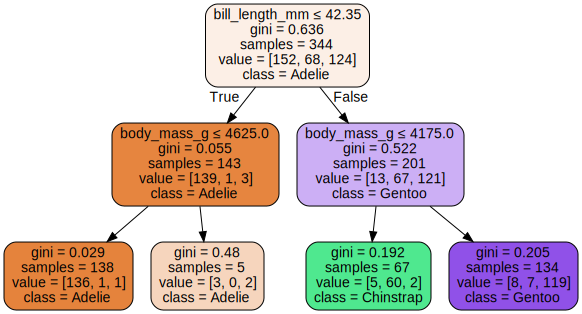

In [8]:
plot_tree_classification(dt, features, penguins.species.unique())

<font color='blue'><b><i>Je ziet in de waarde "value" dat na de eerste splitsing op de bill_length_mm dat de eerste waarde van species duidelijk word gesplitst naar Adelie. De andere twee waardes worden gesplitst naar Gentoo. Vervolgens word er aan de kant van Gentoo een duidelijke splitsing gemaakt tussen Gentoo en Chinstrap. Vanaf dit punt zie je duidelijk de onderscheidende species en is de Decision Tree diep genoeg (depth 2)